In [2]:
import librosa
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2


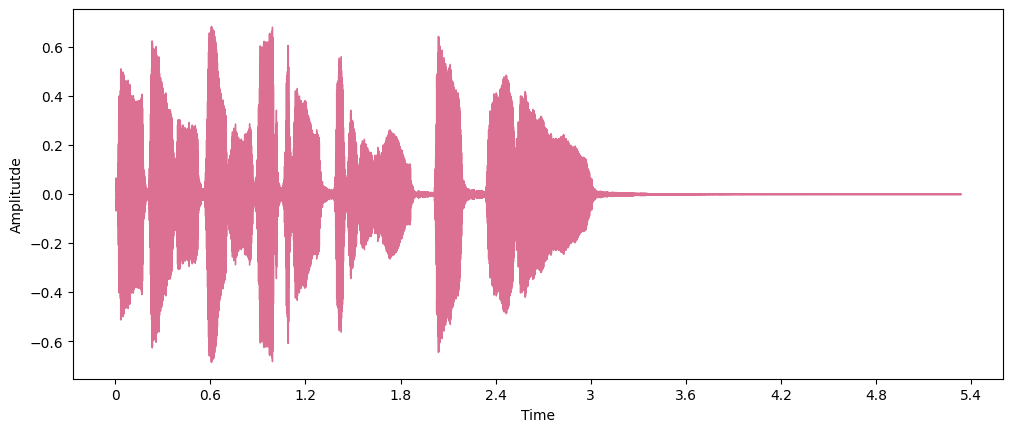

In [2]:
array, sampling_rate = librosa.load(librosa.ex("trumpet"))

plt.figure().set_figwidth(12)
plt.ylabel('Amplitutde')
librosa.display.waveshow(array, sr=sampling_rate, color = 'palevioletred')

In [7]:
Audio(data=array, rate=sampling_rate)

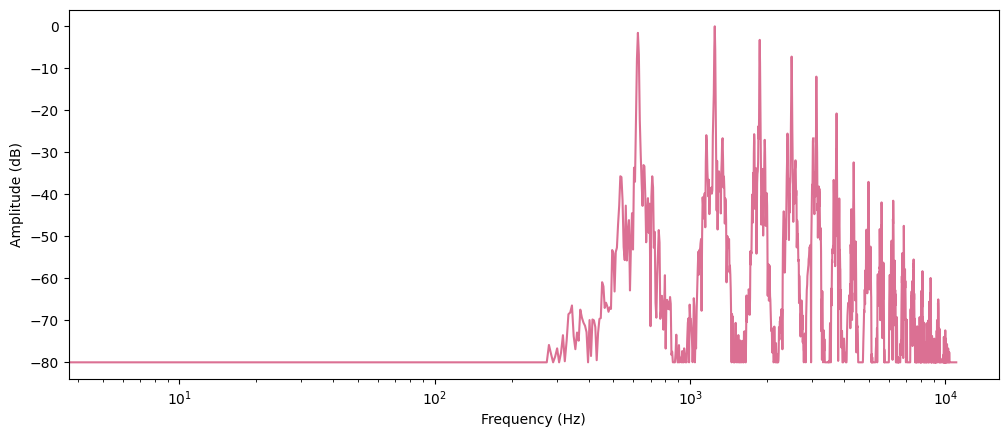

In [8]:


dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db, color = 'palevioletred')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

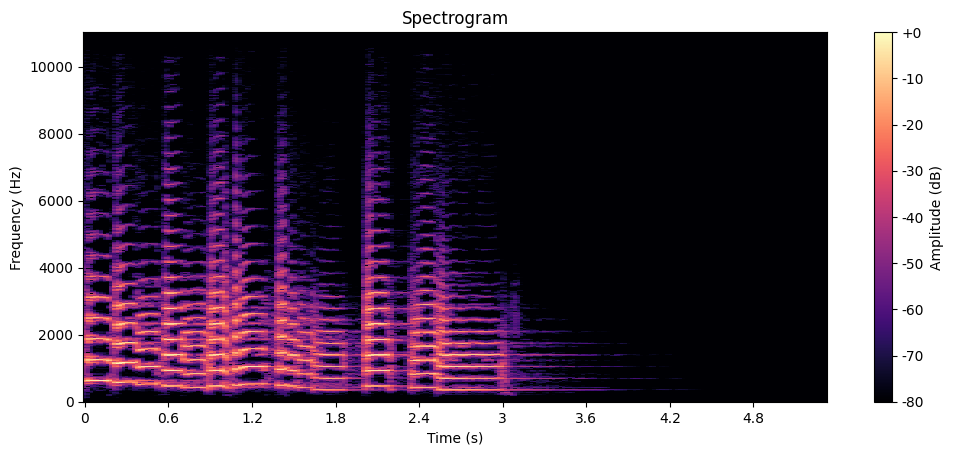

In [10]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Perform Short-Time Fourier Transform (STFT)
D = librosa.stft(array)

# Convert the amplitude spectrogram to decibel units
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Set up the plot
plt.figure().set_figwidth(12)

# Display the spectrogram with time on the x-axis and frequency (in Hz) on the y-axis
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")

# Add a colorbar with units in decibels
cbar = plt.colorbar(format="%+2.0f")
cbar.set_label('Amplitude (dB)')
plt.title("Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()


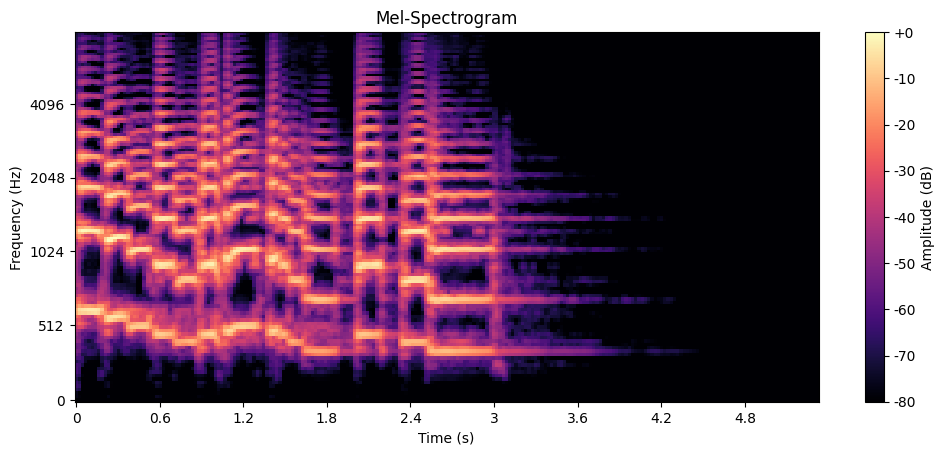

In [3]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
# plt.colorbar()

# Add a colorbar with units in decibels
cbar = plt.colorbar(format="%+2.0f")
cbar.set_label('Amplitude (dB)')
plt.title("Mel-Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

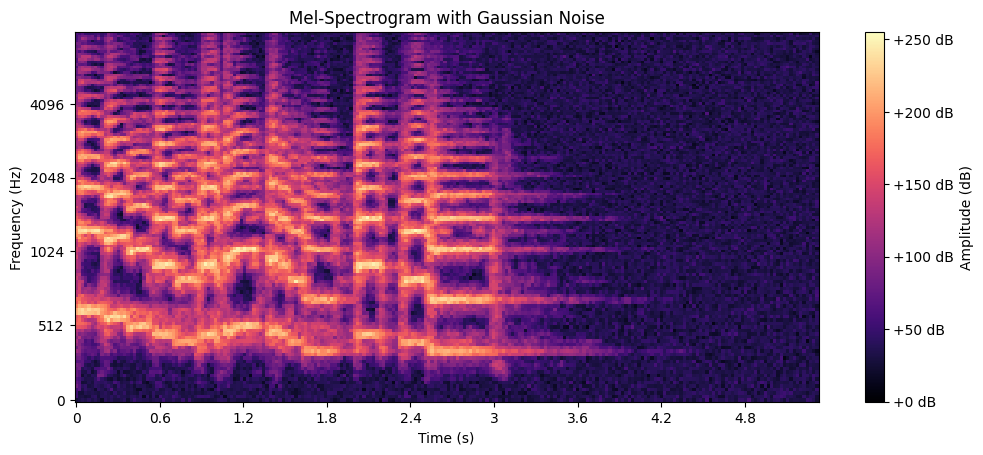

In [8]:
S_noisy_dB = add_gauss_noise(S_dB)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_noisy_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
cbar = plt.colorbar(format="%+2.0f dB")
cbar.set_label('Amplitude (dB)')
plt.title("Mel-Spectrogram with Gaussian Noise")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

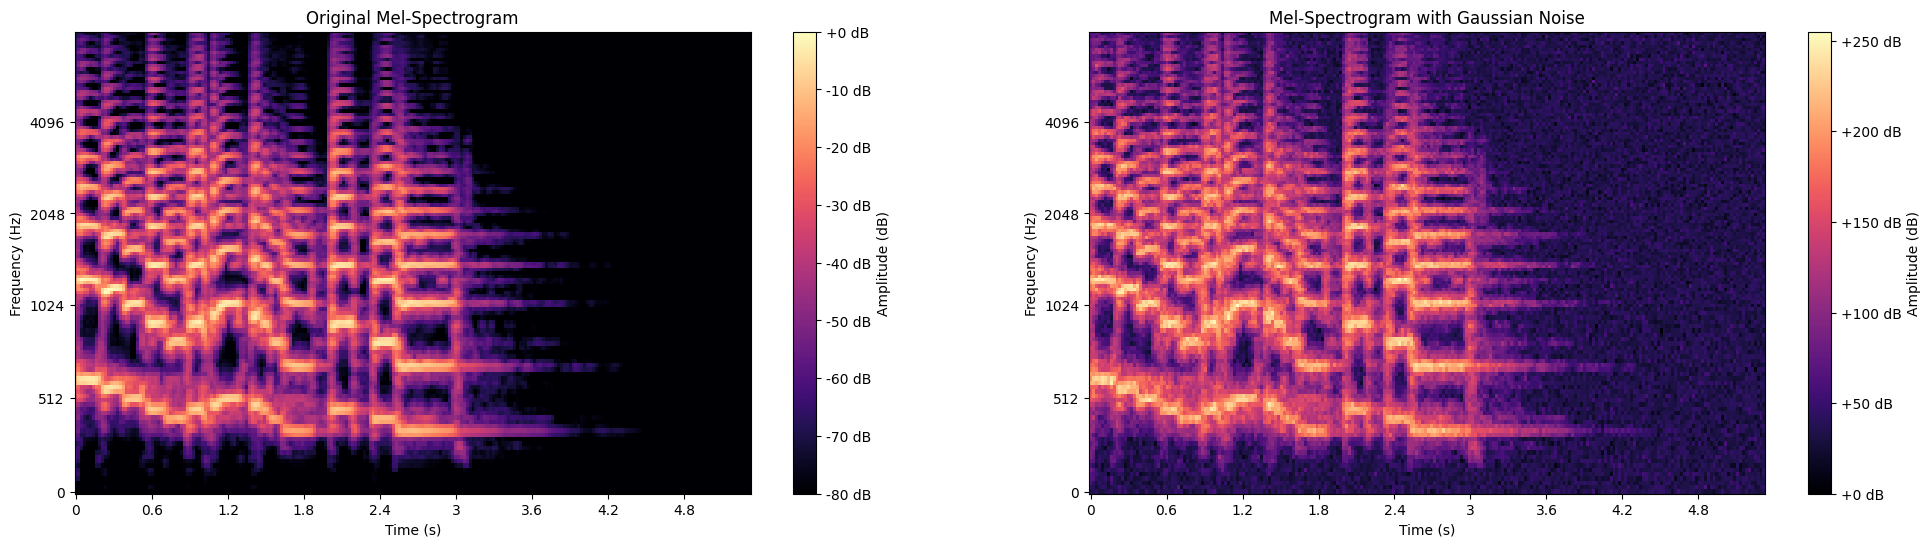

In [10]:
# Assuming S_dB has been computed as before
S_noisy_dB = add_gauss_noise(S_dB)

# Create a figure to hold both subplots
plt.figure(figsize=(24, 6))  # Double the width to accommodate two subplots

# Plot the original Mel-spectrogram
plt.subplot(1, 2, 1)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar(format="%+2.0f dB").set_label('Amplitude (dB)')
plt.title("Original Mel-Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# Plot the Mel-spectrogram with Gaussian noise
plt.subplot(1, 2, 2)
librosa.display.specshow(S_noisy_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar(format="%+2.0f dB").set_label('Amplitude (dB)')
plt.title("Mel-Spectrogram with Gaussian Noise")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.show()


In [4]:
def add_gauss_noise(image, mean = 0, var = 10):
    '''function to add gaussian noise to an image'''
    sigma = var ** 0.5

    #creating a noise image with gaussian distribution
    gaussian = np.random.normal(mean, sigma, (image.shape[0], image.shape[1]))

    #creating a zeroes image
    noisy_image = np.zeros(image.shape, np.float32)

    #adding the noise to the original image
    noisy_image = image + gaussian

    #normalising the image
    cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)

    #changing type
    noisy_image = noisy_image.astype(np.uint8)

    return noisy_image

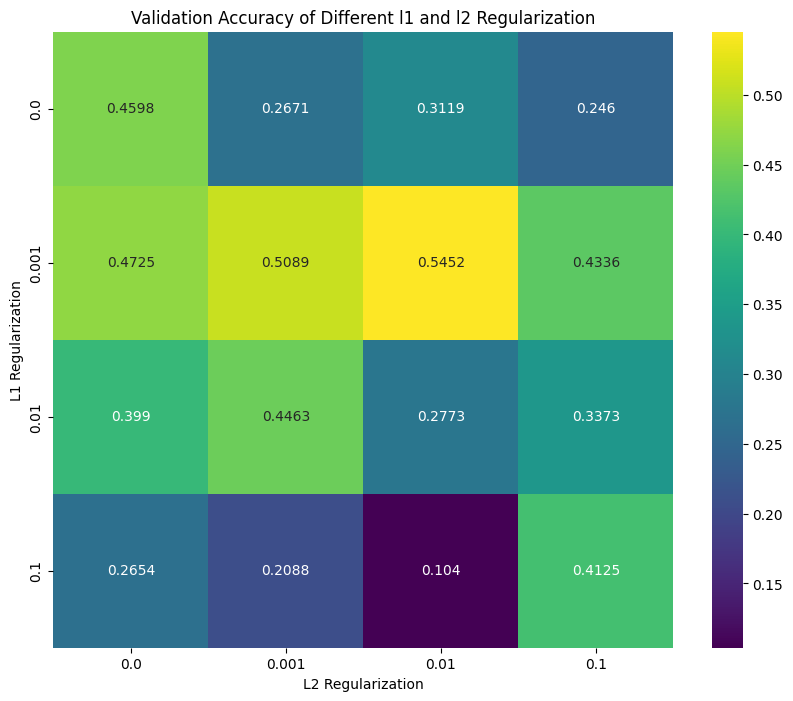

In [3]:

# Prepare the data as a list of dictionaries
data = [
    {'l1_reg': 0.0, 'l2_reg': 0.0, 'val_acc': 0.4598478376865387},
    {'l1_reg': 0.0, 'l2_reg': 0.1, 'val_acc': 0.2459847778081894},
    {'l1_reg': 0.0, 'l2_reg': 0.001, 'val_acc': 0.2671175003051758},
    {'l1_reg': 0.0, 'l2_reg': 0.01, 'val_acc': 0.31191885471343994},
    {'l1_reg': 0.1, 'l2_reg': 0.0, 'val_acc': 0.2654268741607666},
    {'l1_reg': 0.1, 'l2_reg': 0.1, 'val_acc': 0.41251057386398315},
    {'l1_reg': 0.1, 'l2_reg': 0.001, 'val_acc': 0.20879121124744415},
    {'l1_reg': 0.1, 'l2_reg': 0.01, 'val_acc': 0.10397294908761978},
    {'l1_reg': 0.001, 'l2_reg': 0.0, 'val_acc': 0.47252747416496277},
    {'l1_reg': 0.001, 'l2_reg': 0.1, 'val_acc': 0.43364328145980835},
    {'l1_reg': 0.001, 'l2_reg': 0.001, 'val_acc': 0.5088757276535034},
    {'l1_reg': 0.001, 'l2_reg': 0.01, 'val_acc': 0.5452240109443665},
    {'l1_reg': 0.01, 'l2_reg': 0.0, 'val_acc': 0.3989856243133545},
    {'l1_reg': 0.01, 'l2_reg': 0.1, 'val_acc': 0.3372780978679657},
    {'l1_reg': 0.01, 'l2_reg': 0.001, 'val_acc': 0.4463229179382324},
    {'l1_reg': 0.01, 'l2_reg': 0.01, 'val_acc': 0.2772611975669861}
]

# Convert the list of dictionaries to a Pandas DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by l1_reg and l2_reg values
df_sorted = df.sort_values(by=['l1_reg', 'l2_reg'])

# Pivot the sorted DataFrame
pivoted_df = df_sorted.pivot(index='l1_reg', columns='l2_reg', values='val_acc')

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivoted_df, annot=True, fmt=".4g", cmap="viridis")
plt.title("Validation Accuracy of Different l1 and l2 Regularization")
plt.ylabel("L1 Regularization")
plt.xlabel("L2 Regularization")
plt.show()

history_dict: '/home/mendu/Thesis/data/magnatagatune/saved_history_dictionaries/history_dict8.pkl'
l1 = 0.01
l2 = 0.001
alpha = 0.001

	initial_learning_rate = 0.0001 
	
	 early_stopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
	rlronp = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=10, verbose=1)

Training accuracy: 0.8034389019012451, Validation accuracy: 0.7624682784080505
Training loss: 3.7255239486694336, Validation loss: 3.882248640060425

In [3]:
import pandas as pd
column_list = ['model', 'train_acc', 'val_acc', 'train_loss', 
               'val_loss', 'l1', 'l2', 'alpha', 'starting_lr',
               'lr_factor', 'lr_patience', 'early_stop']
model_name = [1, 2, 3, 4, 5, 6, 7, 8, 'gs4', 'gs4', 'gs4', 'gs5', 'gs5', 'gs5', 're9']
train_acc = [0.78, 0.76, 0.7, 0.84, 0.74, 0.79, 0.76, 0.803, 0.81, 0.93, 0.91, 0.92, 0.96, 0.89, 0.79]
val_acc = [0.76, 0.73, 0.68, 0.77, 0.72, 0.75, 0.75, 0.76, 0.75, 0.80, 0.78, 0.80, 0.80, 0.79, 0.75]
train_loss = [5.48, 5.64, 3.22, 1.91, 2.71, 4.42, 4.47, 3.72, 0.82, 0.43, 0.50, 0.49, 0.39, 0.56, 3.86]
val_loss = [5.62, 5.75, 3.3, 2.2, 2.83, 4.55, 4.6, 3.88, 1.00, 0.81, 0.93, 0.89, 0.88, 0.84, 4.04]
l1 = [0.001, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
l2 = [0.01, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.001, 0.001, 0.001, 0.01]
alpha = [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0, 0.001, 0.0001, 0, 0.001, 0.0001, 0.001]
starting_lr = [0.0001, 0.0001, 0.0005, 0.0005, 0.0005, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]
lr_factor = [0.75, 0.75, 0.6, 0.5, 0.1, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.6]
lr_patience = [3, 3, 3, 10, 10, 3, 3, 10, 10, 10, 10, 10, 10, 10, 10]
early_stop = [5, 5, 5, 20, 20, 5, 7, 10, 12, 12, 12, 18, 18, 18, 12]

data = list(zip(model_name, train_acc,val_acc,train_loss,val_loss,l1,l2,alpha,starting_lr, lr_factor, lr_patience,early_stop))

In [4]:
pd.DataFrame(data, columns=column_list)

,model,train_acc,val_acc,train_loss,val_loss,l1,l2,alpha,starting_lr,lr_factor,lr_patience,early_stop
0,1,0.780,0.76,5.48,5.62,0.001,0.010,0.0010,0.0001,0.75,3,5
1,2,0.760,0.73,5.64,5.75,0.010,0.001,0.0010,0.0001,0.75,3,5
2,3,0.700,0.68,3.22,3.30,0.010,0.001,0.0010,0.0005,0.60,3,5
3,4,0.840,0.77,1.91,2.20,0.010,0.001,0.0010,0.0005,0.50,10,20
4,5,0.740,0.72,2.71,2.83,0.010,0.001,0.0010,0.0005,0.10,10,20
5,6,0.790,0.75,4.42,4.55,0.010,0.001,0.0010,0.0001,0.60,3,5
6,7,0.760,0.75,4.47,4.60,0.010,0.001,0.0010,0.0001,0.60,3,7
7,8,0.803,0.76,3.72,3.88,0.010,0.001,0.0010,0.0001,0.50,10,10
8,gs4,0.810,0.75,0.82,1.00,0.010,0.010,0.0000,0.0001,0.60,10,12
9,gs4,0.930,0.80,0.43,0.81,0.010,0.010,0.0010,0.0001,0.60,10,12


In [3]:
d = {"alpha": [10],
     'l2': [0.1]}
only_alpha = False

if ("alpha" in d) & (len(d) == 1):
    only_alpha = True

In [4]:
only_alpha

False

In [4]:
pd.read_csv('/home/mendu/Thesis/data/magnatagatune/saved_df_data/processed_df.csv')

,clip_id,mp3_path,tags
0,2,american_bach_soloists-j_s__bach_solo_cantatas...,opera
1,6,american_bach_soloists-j_s__bach_solo_cantatas...,opera
2,10,american_bach_soloists-j_s__bach_solo_cantatas...,opera
3,11,american_bach_soloists-j_s__bach_solo_cantatas...,opera
4,14,lvx_nova-lvx_nova-01-contimune-30-59.mp3,electronic
...,...,...,...
11821,58896,jacob_heringman-blame_not_my_lute-56-la_bressa...,classical
11822,58897,jacob_heringman-blame_not_my_lute-56-la_bressa...,classical
11823,58898,jacob_heringman-blame_not_my_lute-56-la_bressa...,classical
11824,58907,jacob_heringman-blame_not_my_lute-57-lost_is_m...,classical
